In [ ]:
!wget https://raw.githubusercontent.com/vogelab/MTSvsSOP/main/Python%20simulations/MTSvsSOP.py
!wget https://raw.githubusercontent.com/vogelab/MTSvsSOP/main/Python%20simulations/miscellaneous_functions.py

In [1]:
import MTSvsSOP as hab
import miscellaneous_functions as func
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

Plotting Figure 5


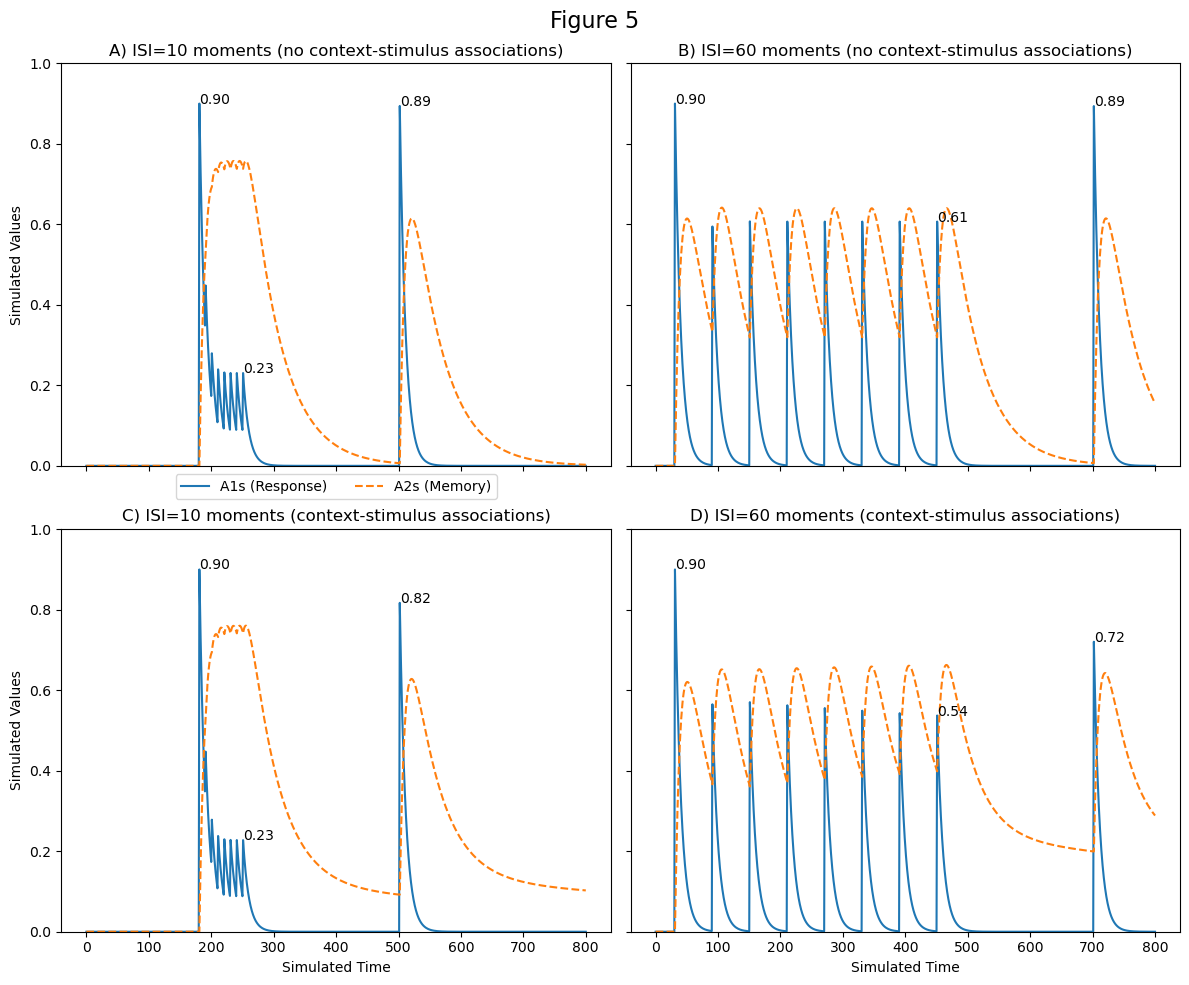

Plotting Figure 6


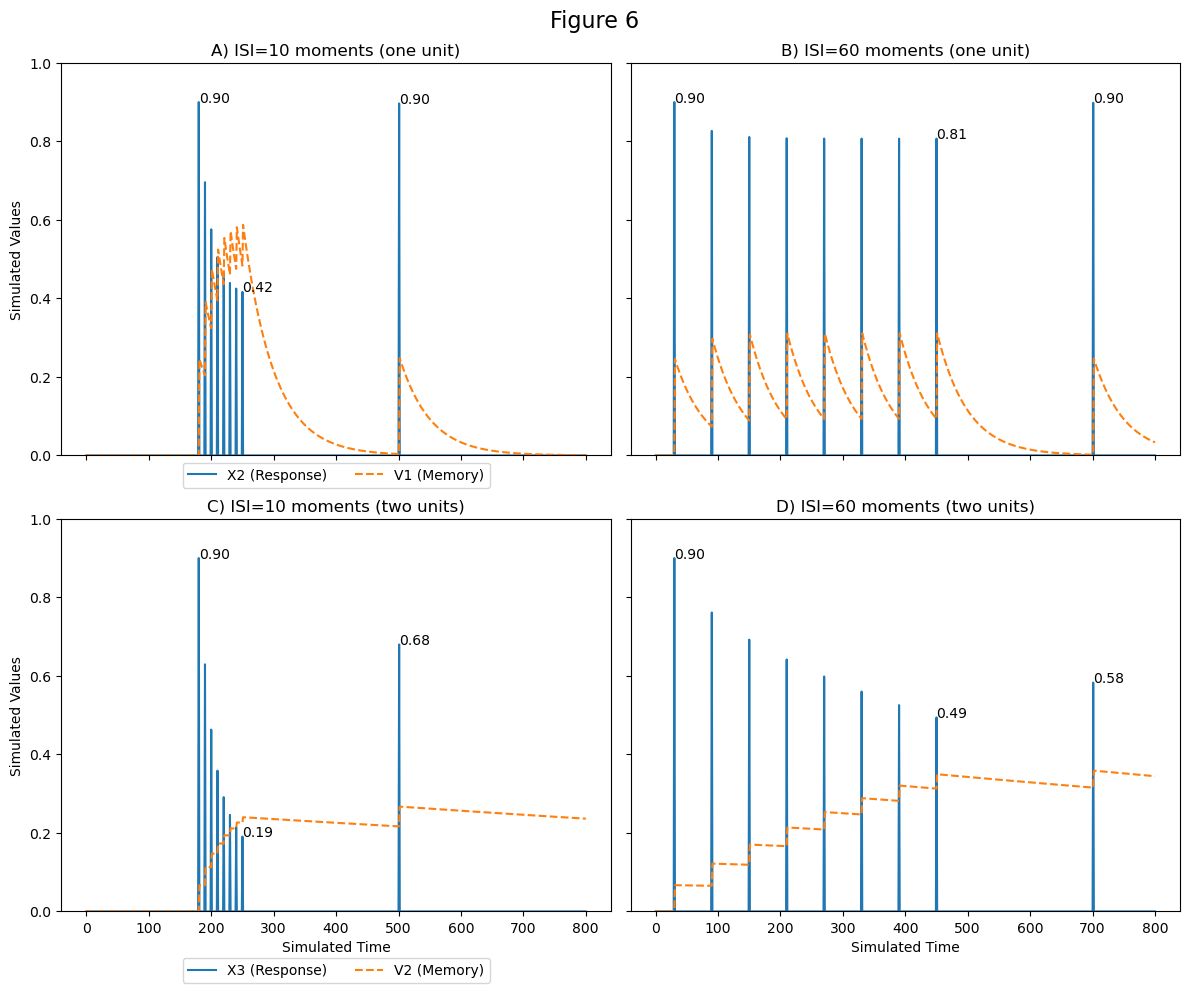

In [2]:
#Figure 5 & 6
time = np.linspace(0,800,801,dtype=int)

short_isi_trials = hab.trials(8,10,180)
short_isi_tests = hab.test(250, short_isi_trials[-1])
short_isi_stimuli = short_isi_trials + short_isi_tests

long_isi_trials = hab.trials(8,60,30)
long_isi_tests = hab.test(250, long_isi_trials[-1])
long_isi_stimuli = long_isi_trials + long_isi_tests


#SOP
#Without context
f5A = hab.SOP_Node(len(time))
f5B = hab.SOP_Node(len(time))

#with context
f5C_stimulus = hab.SOP_Node(len(time))
f5C_context = hab.SOP_Node(len(time), p1=0.05)
f5C_stimulus.associate(len(time), f5C_context)

f5D_stimulus = hab.SOP_Node(len(time))
f5D_context = hab.SOP_Node(len(time), p1=0.05)
f5D_stimulus.associate(len(time), f5D_context)

#MTS
#One-unit model
f6A = hab.MTS(len(time), n_integrators=1)
f6B = hab.MTS(len(time), n_integrators=1)

#Two-unit model
f6C = hab.MTS(len(time))
f6D = hab.MTS(len(time))

for i in time[0:-1]:
    short = 1 if i in short_isi_stimuli else 0
    long = 1 if i in long_isi_stimuli else 0

    f5A.update(i,short)
    f5B.update(i,long)
    
    f5C_context.update(i,1)
    f5C_stimulus.update(i,short)
    f5D_context.update(i,1)
    f5D_stimulus.update(i,long)
    
    f6A.update("FB",i,short)
    f6B.update("FB",i,long)
    f6C.update("FB",i,short)
    f6D.update("FB",i,long)

func.fig5(f5A,f5B,f5C_stimulus,f5D_stimulus)
func.fig6(f6A,f6B,f6C,f6D)

Plotting Figure 7


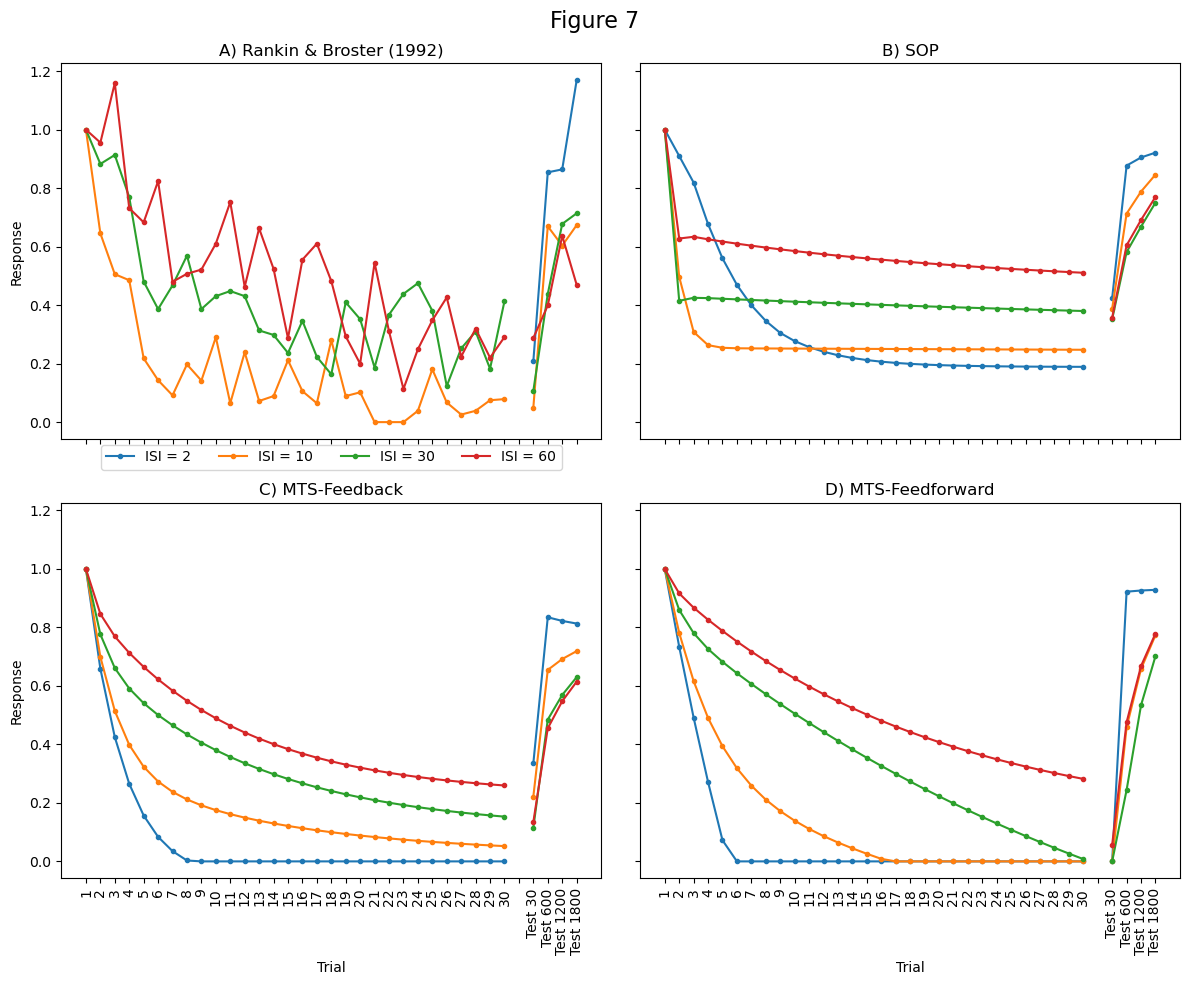

Plotting Figure 8


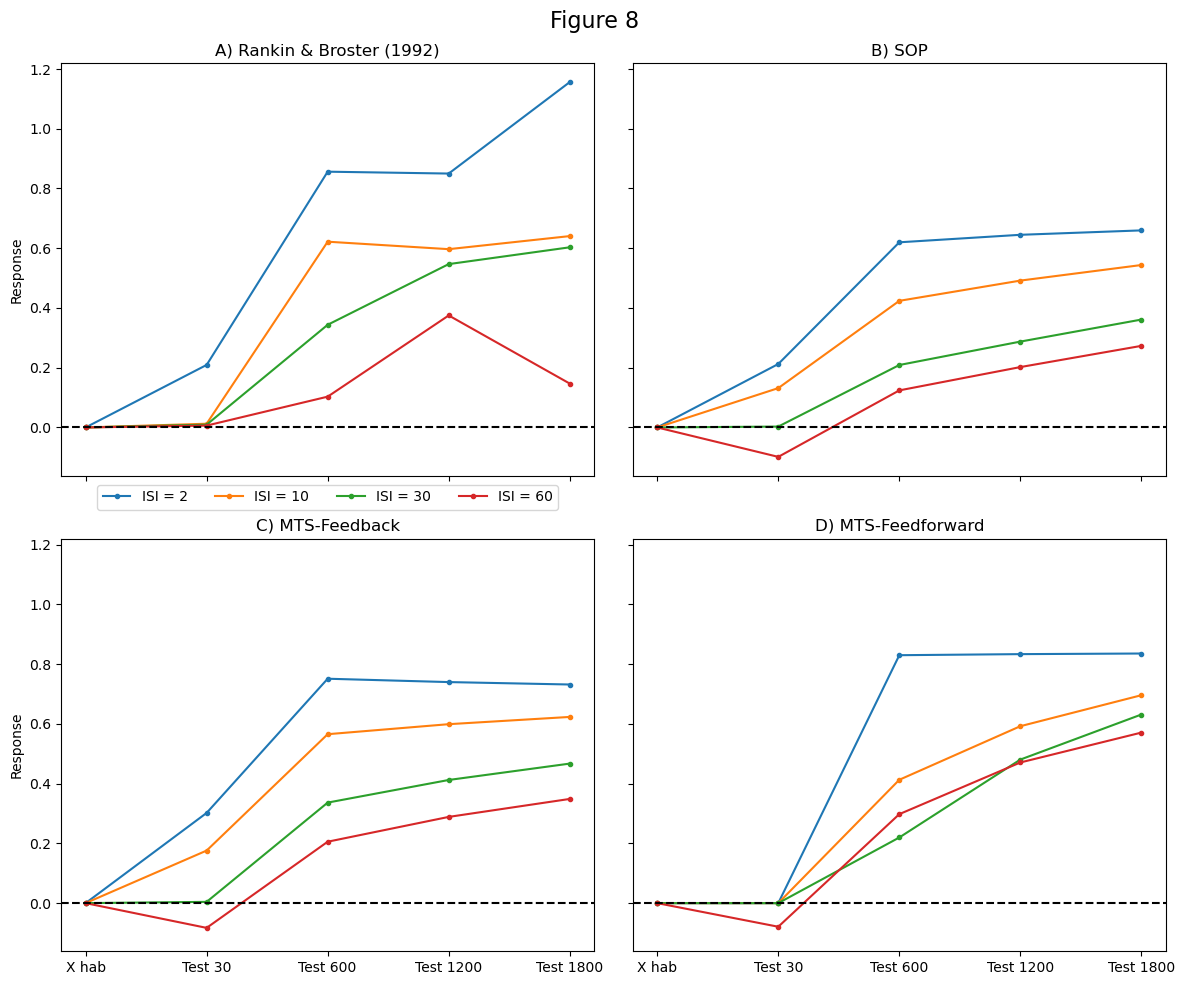

In [3]:
#Figure 7 & 8
time = np.linspace(0,7000,7001,dtype=int)

isi2_trials = hab.trials(60,2,30)
isi2_tests = hab.test([30,600,1200,1800],isi2_trials[-1])
isi2_stimuli = isi2_trials + isi2_tests

isi10_trials = hab.trials(60,10,30)
isi10_tests = hab.test([30,600,1200,1800],isi10_trials[-1])
isi10_stimuli = isi10_trials + isi10_tests

isi30_trials = hab.trials(60,30,30)
isi30_tests = hab.test([30,600,1200,1800],isi30_trials[-1])
isi30_stimuli = isi30_trials + isi30_tests

isi60_trials = hab.trials(60,60,30)
isi60_tests = hab.test([30,600,1200,1800],isi60_trials[-1])
isi60_stimuli = isi60_trials + isi60_tests

#SOP
f7B = []
for _ in range(4):
    f7B_stimulus = hab.SOP_Node(len(time))
    f7B_context = hab.SOP_Node(len(time),p1 = 0.05)
    f7B_stimulus.associate(len(time),f7B_context)
    f7B.append([f7B_stimulus,f7B_context])

#MTS
f7C = []
f7D = []
for _ in range(4):
    f7C.append(hab.MTS(len(time))) #Feedback
    f7D.append(hab.MTS(len(time), lambda_a=3.5, lambda_b=1.5)) #Feedforward


for i in time[0:-1]:
    isi2 = 1 if i in isi2_stimuli else 0
    isi10 = 1 if i in isi10_stimuli else 0
    isi30 = 1 if i in isi30_stimuli else 0
    isi60 = 1 if i in isi60_stimuli else 0

    isi = [isi2, isi10, isi30, isi60]
    
    for j,s in enumerate(isi):
        f7B[j][1].update(i,1)
        f7B[j][0].update(i,s)
        
        f7C[j].update("FB",i,s)
        f7D[j].update("FF",i,s)

func.fig7(f7B,f7C, f7D,isi2_stimuli,isi10_stimuli,isi30_stimuli,isi60_stimuli,time)
func.fig8(f7B,f7C, f7D,isi2_stimuli,isi10_stimuli,isi30_stimuli,isi60_stimuli,time)

100%|██████████████████████████████████████████████████████████████████████| 1040400/1040400 [03:25<00:00, 5056.69it/s]


Plotting Figure 9


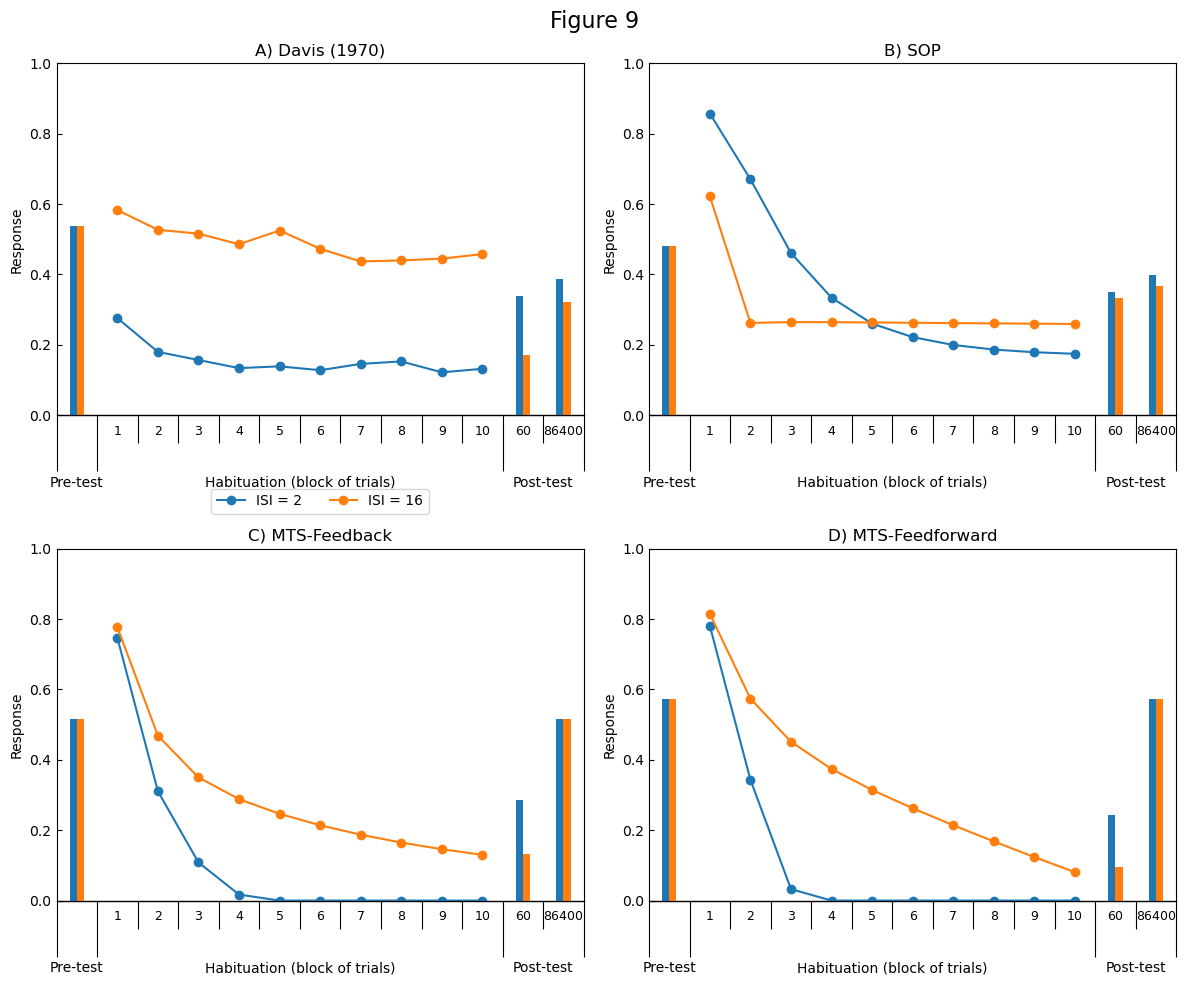

In [4]:
#Figure 9

time = np.linspace(0,173400,173401,dtype=int)

start_at = 30

#Counterbalancing conditions
c1 = [0, 2, 4, 20, 36]
c2 = [0, 2, 18, 20, 36]
c3 = [0, 2, 18, 34, 36]
c4 = [0, 16, 32, 34, 36]
c5 = [0, 16, 18, 20, 36]
c6 = [0, 16, 18, 34, 36]

C = [c1, c2, c3, c4, c5, c6]

isi2_trials = hab.trials(20,2,86466)
isi16_trials = hab.trials(20,16,86466)

isi2_stimuli60 = []
isi16_stimuli60 = []

isi2_stimuli86400 = []
isi16_stimuli86400 = []

#Stimuli for SOP context
isi2_context60 = []
isi16_context60 = []

isi2_context86400 = []
isi16_context86400 = []

for c in C:
    c_pre = [start_at + i for i in c]
    
    c_post2_ri60 = [isi2_trials[-1]+ 61 + i for i in c]
    c_post2_ri86400 = [isi2_trials[-1]+ 86401 + i for i in c]
    isi2_stimuli60.append(c_pre + isi2_trials + c_post2_ri60)
    isi2_stimuli86400.append(c_pre + isi2_trials + c_post2_ri86400)

    context2_ri60 = np.concatenate([time[0:c_pre[-1]+11], time[isi2_trials[0] - 2::]])
    context2_ri86400 = np.concatenate([time[0:c_pre[-1]+11], time[isi2_trials[0] - 2:isi2_trials[-1]+11],
                    time[c_post2_ri86400[0] - 30:c_post2_ri86400[-1]+11]])
    isi2_context60.append(context2_ri60)
    isi2_context86400.append(context2_ri86400)

    c_post16_ri60 = [isi16_trials[-1]+ 61 + i for i in c]
    c_post16_ri86400 = [isi16_trials[-1]+ 86401 + i for i in c]
    isi16_stimuli60.append(c_pre + isi16_trials + c_post16_ri60)
    isi16_stimuli86400.append(c_pre + isi16_trials + c_post16_ri86400)
    
    context16_ri60 = np.concatenate([time[0:c_pre[-1]+11], time[isi16_trials[0] - 2:]])
    context16_ri86400 = np.concatenate([time[0:c_pre[-1]+11], time[isi16_trials[0] - 2:isi16_trials[-1]+11],
                    time[c_post16_ri86400[0] - 30:c_post16_ri86400[-1]+11]])
    isi16_context60.append(context16_ri60)
    isi16_context86400.append(context16_ri86400)

f9B = [] #SOP
for _ in range(24):
    f9B_stimulus = hab.SOP_Node(len(time))
    f9B_context = hab.SOP_Node(len(time),p1 = 0.05)
    f9B_stimulus.associate(len(time),f9B_context)
    f9B.append([f9B_stimulus,f9B_context])

f9C = [] #MTS-FB
f9D = [] #MTS-FF
for _ in range(24):
    f9C.append(hab.MTS(len(time))) #Feedback
    f9D.append(hab.MTS(len(time), lambda_a=3.5, lambda_b=1.5)) #Feedforward

k = 0

with tqdm(total=6 * len(time[0:-1])) as pbar:
    for c in range(6):
        for i in time[0:-1]:
            isi2_60 = 1 if i in isi2_stimuli60[c] else 0
            isi2_86400 = 1 if i in isi2_stimuli86400[c] else 0
            isi2_60context = 1 if i in isi2_context60[c] else 0
            isi2_86400context = 1 if i in isi2_context86400[c] else 0
    
            isi16_60 = 1 if i in isi16_stimuli60[c] else 0
            isi16_86400 = 1 if i in isi16_stimuli86400[c] else 0
            isi16_60context = 1 if i in isi16_context60[c] else 0
            isi16_86400context = 1 if i in isi16_context86400[c] else 0

            f9B[k][1].update(i,isi2_60context)
            f9B[k][0].update(i,isi2_60)
            f9B[k+1][1].update(i,isi16_60context)
            f9B[k+1][0].update(i,isi16_60)
            f9B[k+2][1].update(i,isi2_86400context)
            f9B[k+2][0].update(i,isi2_86400)
            f9B[k+3][1].update(i,isi16_86400context)
            f9B[k+3][0].update(i,isi16_86400)

            f9C[k].update("FB",i,isi2_60)
            f9C[k+1].update("FB",i,isi16_60)
            f9C[k+2].update("FB",i,isi2_86400)
            f9C[k+3].update("FB",i,isi16_86400)
        
            f9D[k].update("FF",i,isi2_60)
            f9D[k+1].update("FF",i,isi16_60)
            f9D[k+2].update("FF",i,isi2_86400)
            f9D[k+3].update("FF",i,isi16_86400)
            pbar.update(1)

        k += 4

func.fig9(f9B,f9C,f9D,isi2_stimuli60,isi2_stimuli86400,isi16_stimuli60,isi16_stimuli86400,time)

100%|███████████████████████████████████████████████████████████████████████| 720000/720000 [00:47<00:00, 15140.10it/s]


Plotting Figure 10


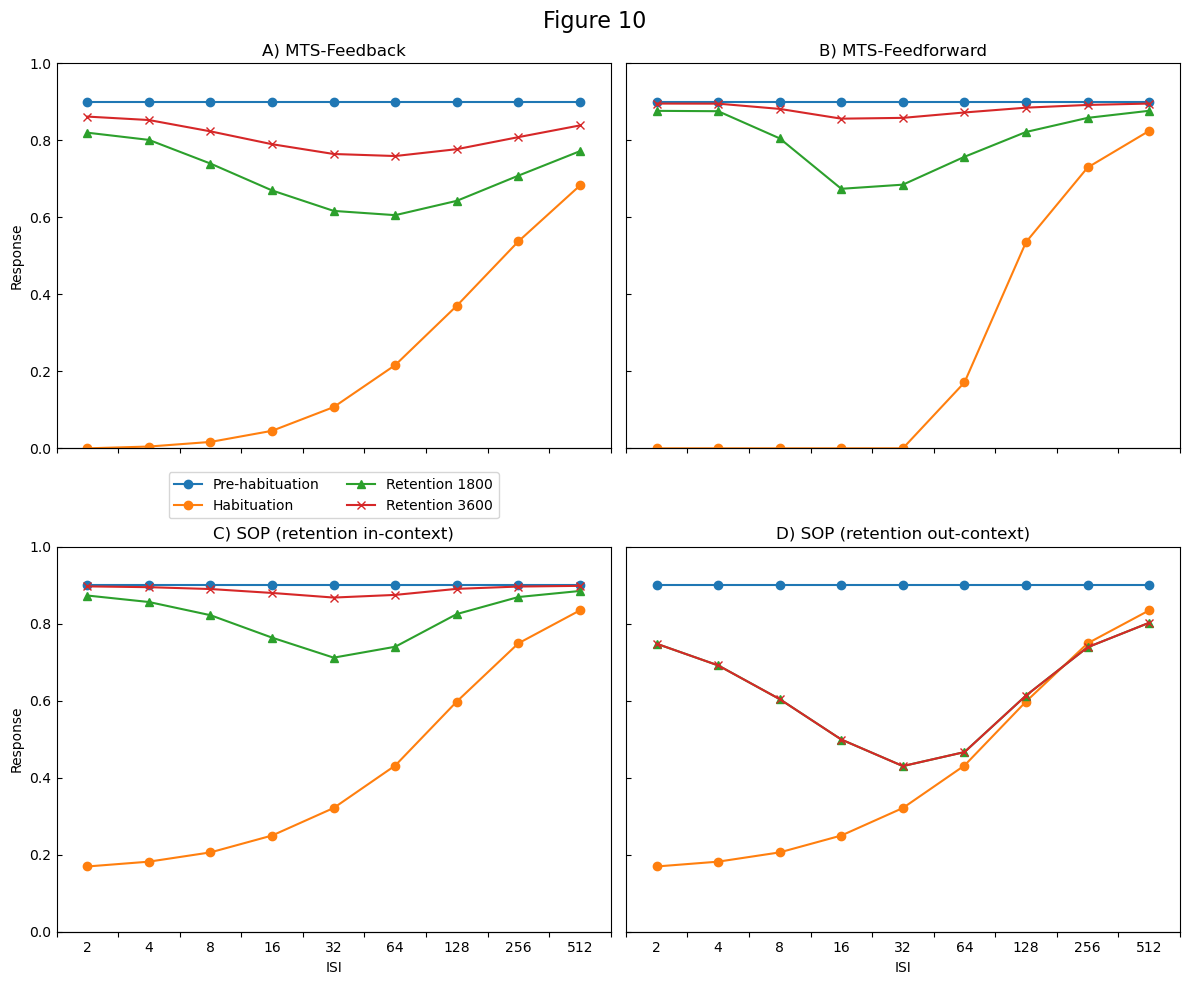

In [5]:
#Figure 10

time = np.linspace(0,40000,40001,dtype=int)

trials = 2*[hab.trials(60,2**i,30) for i in range(1,10)]
tests = [hab.test(1800, trials[i][-1]) for i in range(9)] + [hab.test(3600, trials[i][-1]) for i in range(9)]
stimuli = [trials[i] + tests[i] for i in range(18)]

stimuli_context = [np.concatenate([time[0:stimuli[i][-2] + 12], time[stimuli[i][-1]-31::]]) for i in range(18)]

#MTS
f10A = [] #MTS-FB
f10B = [] #MTS-FF
for _ in range(18):
    f10A.append(hab.MTS(len(time))) #Feedback
    f10B.append(hab.MTS(len(time), lambda_a=3.5, lambda_b=1.5)) #Feedforward

#SOP
f10C = [] #RI in
f10D = [] #RI out
for _ in range(18):
    f10C_stimulus = hab.SOP_Node(len(time))
    f10C_context = hab.SOP_Node(len(time),p1 = 0.05)
    f10C_stimulus.associate(len(time),f10C_context)
    f10C.append([f10C_stimulus,f10C_context])
    
    f10D_stimulus = hab.SOP_Node(len(time))
    f10D_context = hab.SOP_Node(len(time),p1 = 0.05)
    f10D_stimulus.associate(len(time),f10D_context)
    f10D.append([f10D_stimulus,f10D_context])

with tqdm(total=18 * len(time[0:-1])) as pbar:
    for c in range(18):
        for i in time[0:-1]:
            s = 1 if i in stimuli[c] else 0
            s_context = 1 if i in stimuli_context[c] else 0

            f10A[c].update("FB",i,s)
            f10B[c].update("FF",i,s)

            f10C[c][1].update(i,1)
            f10C[c][0].update(i,s)
            
            f10D[c][1].update(i,s_context)
            f10D[c][0].update(i,s)
            
            pbar.update(1)

func.fig10(f10A, f10B, f10C, f10D, stimuli, time)

Plotting Figure 11


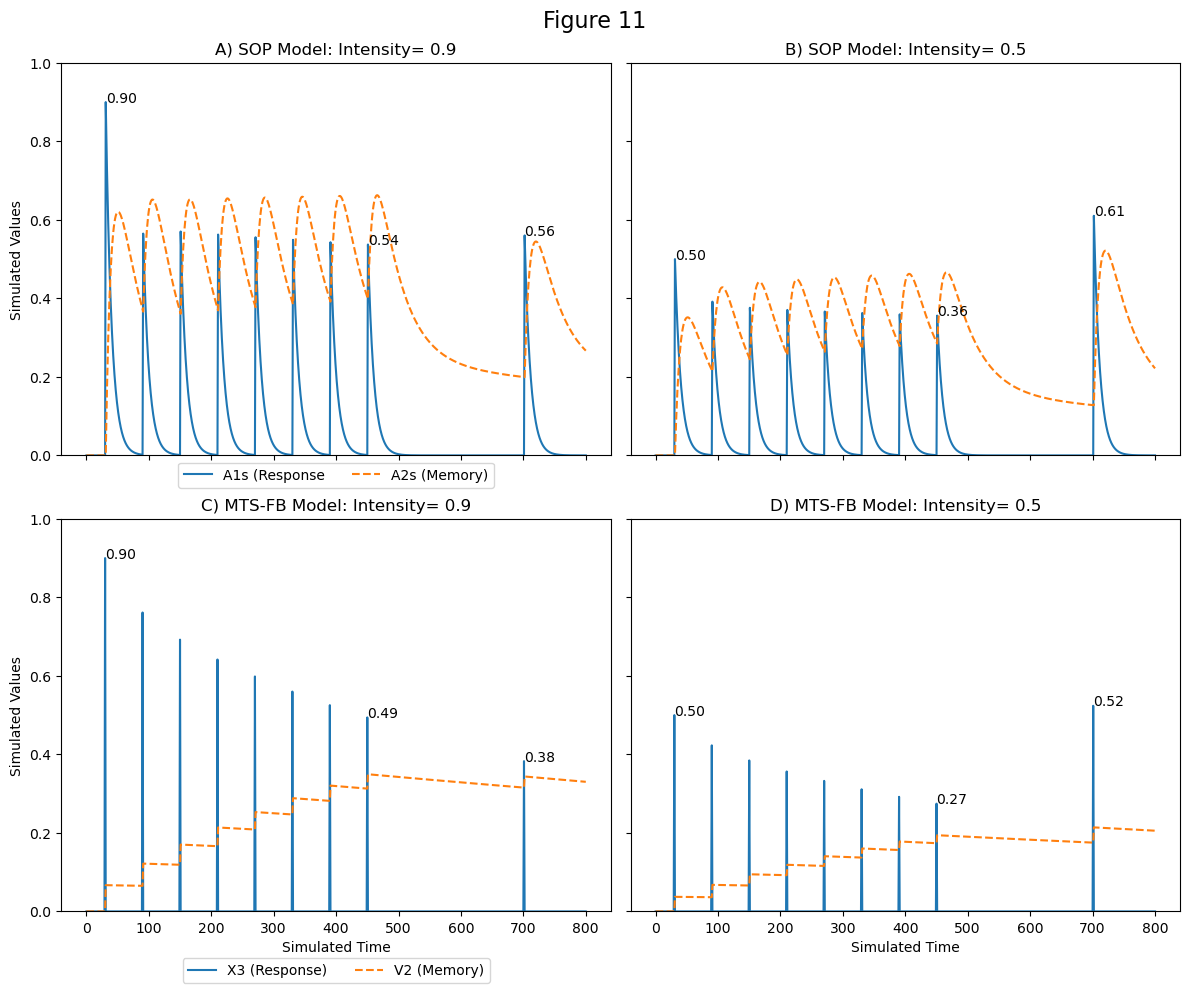

In [6]:
#Figure 11

time = np.linspace(0,800,801,dtype=int)

trials = hab.trials(8,60,30)
tests = hab.test(250, trials[-1])
stimuli = trials + tests


#SOP
#High p1
f11A_stimulus = hab.SOP_Node(len(time))
f11A_context = hab.SOP_Node(len(time), p1=0.05)
f11A_stimulus.associate(len(time), f11A_context)

#Low p1
f11B_stimulus = hab.SOP_Node(len(time),p1=0.5)
f11B_context = hab.SOP_Node(len(time), p1=0.05)
f11B_stimulus.associate(len(time), f11B_context)

#MTS
#High X1
f11C = hab.MTS(len(time))

#Low X1
f11D = hab.MTS(len(time), X1=0.5)

for i in time[0:-1]:
    s = 1 if i in stimuli else 0

    h_intensity = 0.9
    l_intensity = 0.5
    
    if i == stimuli[-1]:
        h_intensity = 0.7
        l_intensity = 0.7

    f11A_context.update(i,1)
    f11A_stimulus.update(i,s,h_intensity)
    f11B_context.update(i,1)
    f11B_stimulus.update(i,s,l_intensity)
    
    f11C.update("FB",i,s,h_intensity)
    f11D.update("FB",i,s,l_intensity)
func.fig11(f11A_stimulus, f11B_stimulus, f11C, f11D)

100%|███████████████████████████████████████████████████████████████████████████| 4000/4000 [00:00<00:00, 17413.76it/s]


Plotting Figure 12


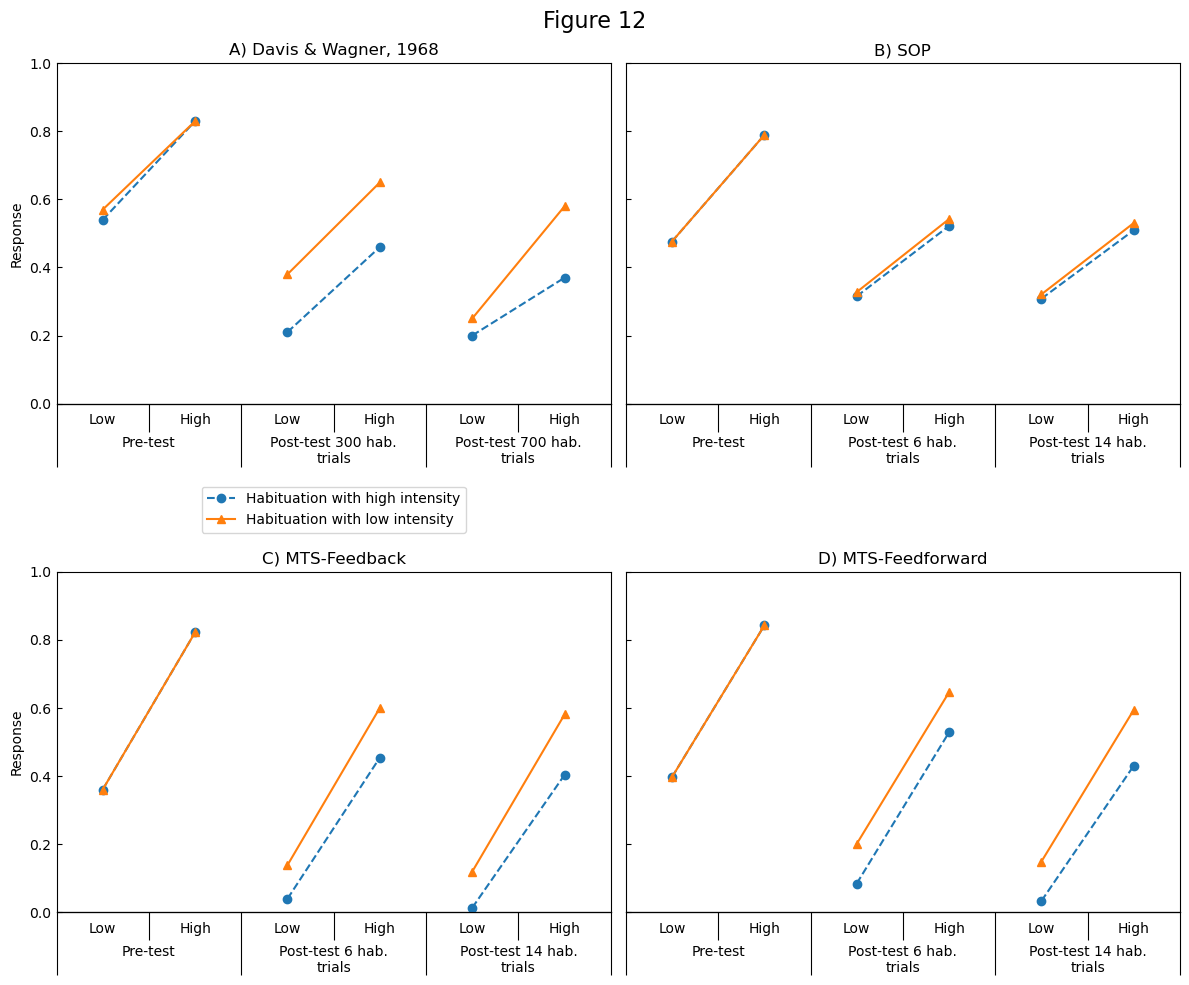

In [7]:
#Figure 12
time = np.linspace(0,500,501,dtype=int)

prehab = [30, 38]
trials6 = hab.trials(6,8,98)
tests6 = hab.test([59,67], trials6[-1])
trials14 = hab.trials(14,8,98)
tests14 = hab.test([59,67], trials14[-1])


stimuli6 = prehab + trials6 + tests6
stimuli14 = prehab + trials14 + tests14

#SOP
f12B = []
for _ in range(8):
    f12B_stimulus = hab.SOP_Node(len(time))
    f12B_context = hab.SOP_Node(len(time),p1=0.05)
    f12B_stimulus.associate(len(time),f12B_context)
    f12B.append([f12B_stimulus,f12B_context])

#MTS
f12C = [] #MTS-FB
f12D = [] #MTS-FF
for _ in range(8):
    f12C.append(hab.MTS(len(time))) #Feedback
    f12D.append(hab.MTS(len(time), lambda_a=3.5, lambda_b=1.5)) #Feedforward

pre_post = 4*[[0.9, 0.5]] + 4*[[0.5, 0.9]]
stimuli = 2*(2*[stimuli6] + 2*[stimuli14])
intensities = 4*[0.9, 0.5]

with tqdm(total=8 * len(time[0:-1])) as pbar:
    for c in range(8):
        intensity = intensities[c]
        for i in time[0:-1]:
            s = 1 if i in stimuli[c] else 0
            
            if i == stimuli[c][0] or i == stimuli[c][-2]:
                intensity = pre_post[c][0]
            elif i == stimuli[c][1] or i == stimuli[c][-1]:
                intensity = pre_post[c][1]

            f12B[c][1].update(i,1)
            f12B[c][0].update(i,s,intensity)
    
            f12C[c].update("FB",i,s,intensity)
            f12D[c].update("FF",i,s,intensity)

            if intensity != intensities[c]:
                intensity = intensities[c] 
            pbar.update(1)

func.fig12(f12B, f12C, f12D, stimuli, time)

Plotting Figure 13


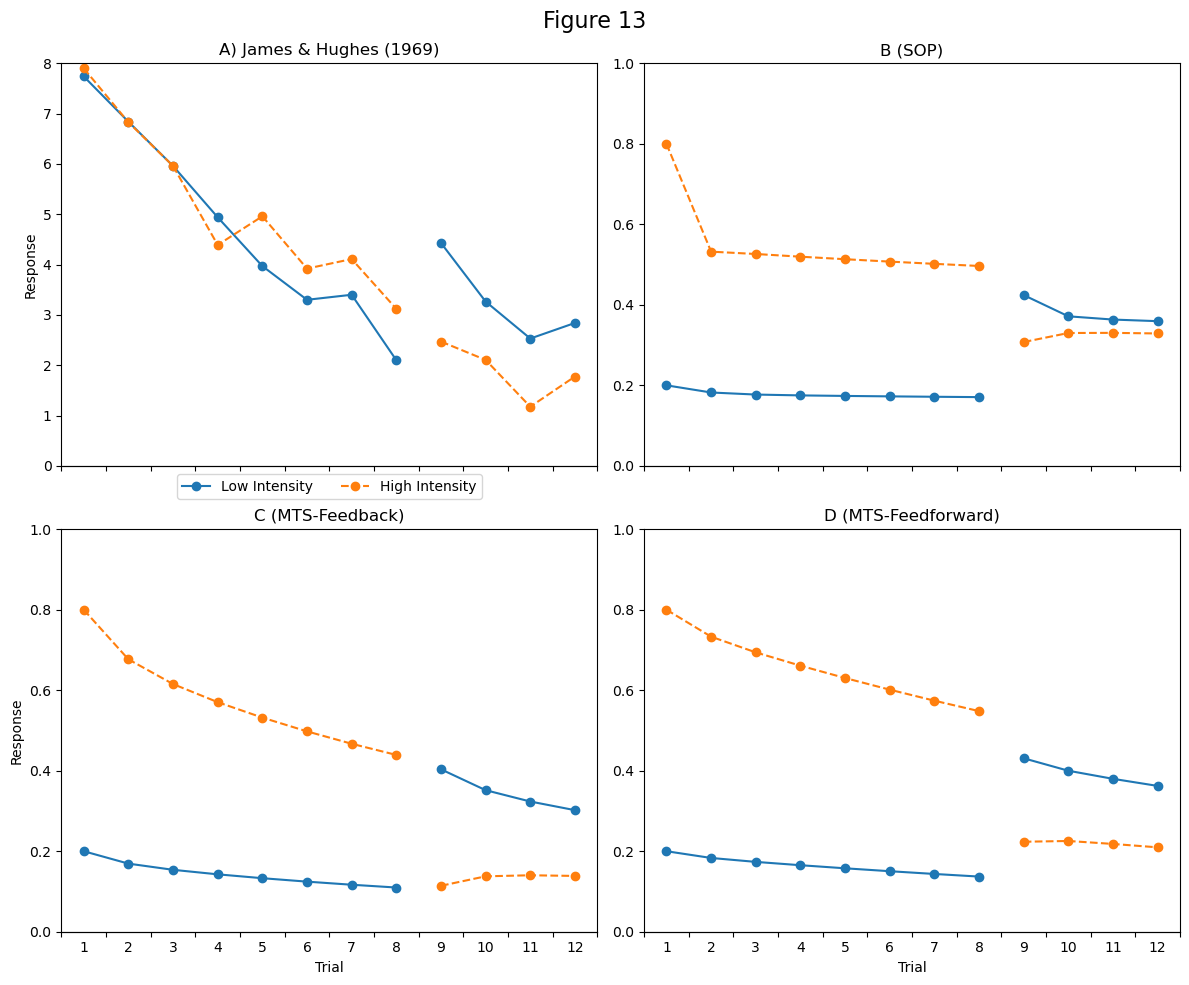

In [8]:
#Figure 13
time = np.linspace(0,700,701,dtype=int)

trials = hab.trials(12,60,30)

#SOP
f13B = []
for _ in range(4):
    f13B_stimulus = hab.SOP_Node(len(time))
    f13B_context = hab.SOP_Node(len(time),p1=0.05)
    f13B_stimulus.associate(len(time),f13B_context)
    f13B.append([f13B_stimulus,f13B_context])

#MTS-FB
f13C = [hab.MTS(len(time)) for _ in range(4)]

#MTS-FF
f13D = [hab.MTS(len(time),lambda_a=3.5, lambda_b=1.5) for _ in range(4)]


i1 = 0.2
i2 = 0.8
i3 = 0.4
i4 = 0.6


for c in range(4):
    intensity = i1 if c < 2 else i2
    sum = 0
    
    for i in time[0:-1]:
        s = 1 if i in trials else 0
        sum += s

        if sum > 8:
            intensity = i3 if c == 0 or c == 2 else i4
        
        f13B[c][1].update(i,1)
        f13B[c][0].update(i,s,intensity)
        
        f13C[c].update("FB",i,s,intensity)
        f13D[c].update("FF",i,s,intensity)

func.fig13(f13B, f13C, f13D, trials, time)

100%|█████████████████████████████████████████████████████████████████████████| 99000/99000 [00:07<00:00, 13807.06it/s]


Plotting Figure 14


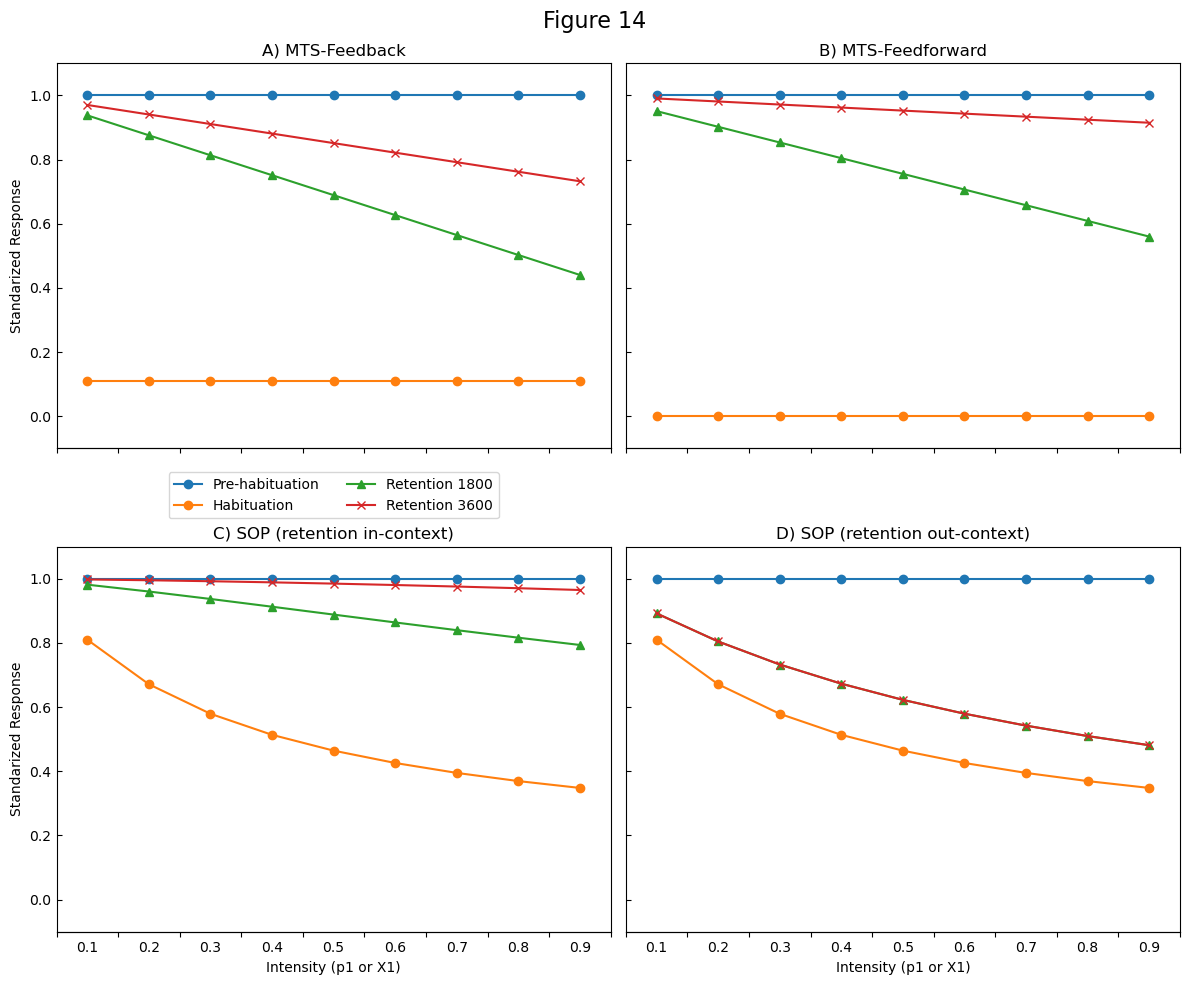

In [9]:
#Figure 14
time = np.linspace(0,5500,5501,dtype=int)

trials = hab.trials(60,30,30)

stimuli1800 = trials + hab.test(1800, trials[-1])
stimuli3600 = trials + hab.test(3600, trials[-1])
stimuli = 9*[stimuli1800] + 9*[stimuli3600]

stimuli_context1800 = np.concatenate([time[0:stimuli1800[-2] + 12], time[stimuli1800[-1]-31::]])
stimuli_context3600 = np.concatenate([time[0:stimuli3600[-2] + 12], time[stimuli3600[-1]-31::]])
stimuli_context = 9*[stimuli_context1800] + 9*[stimuli_context3600]

intensities = 2*[i/10 for i in range(1,10)]

#MTS
f14A = [] #MTS-FB
f14B = [] #MTS-FF
for _ in range(18):
    f14A.append(hab.MTS(len(time))) #Feedback
    f14B.append(hab.MTS(len(time), lambda_a=3.5, lambda_b=1.5)) #Feedforward

#SOP
f14C = [] #RI in
f14D = [] #RI out
for _ in range(18):
    f14C_stimulus = hab.SOP_Node(len(time))
    f14C_context = hab.SOP_Node(len(time),p1 = 0.05)
    f14C_stimulus.associate(len(time),f14C_context)
    f14C.append([f14C_stimulus,f14C_context])
    
    f14D_stimulus = hab.SOP_Node(len(time))
    f14D_context = hab.SOP_Node(len(time),p1 = 0.05)
    f14D_stimulus.associate(len(time),f14D_context)
    f14D.append([f14D_stimulus,f14D_context])

with tqdm(total=18 * len(time[0:-1])) as pbar:
    for c in range(18):
        intensity = intensities[c]
        for i in time[0:-1]:
            s = 1 if i in stimuli[c] else 0
            s_context = 1 if i in stimuli_context[c] else 0
            if i == stimuli[c][-1]:
                intensity = 0.5

            f14A[c].update("FB",i,s,intensity)
            f14B[c].update("FF",i,s,intensity)

            f14C[c][1].update(i,1)
            f14C[c][0].update(i,s,intensity)

            f14D[c][1].update(i,s_context)
            f14D[c][0].update(i,s,intensity)
            
            pbar.update(1)

func.fig14(f14A, f14B, f14C, f14D, stimuli, time)

Plotting Figure 15


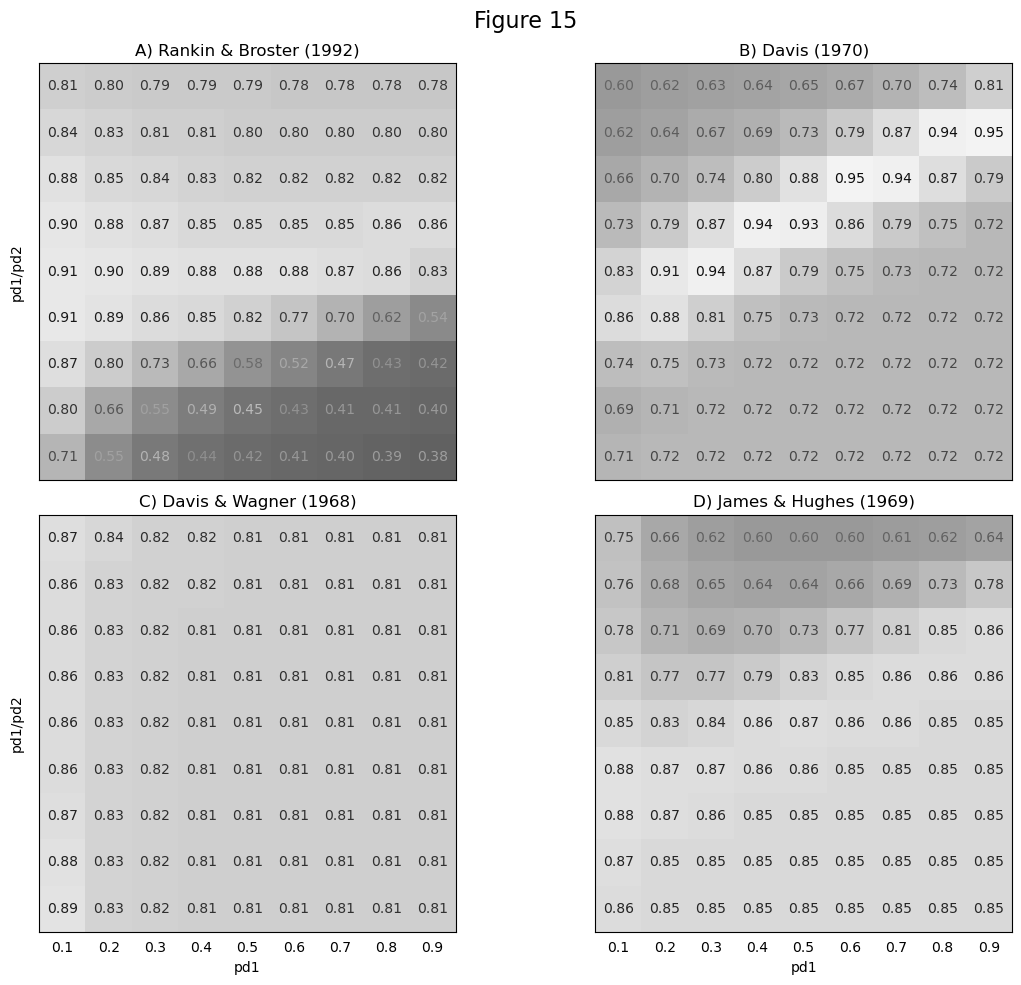

Plotting Figure 16


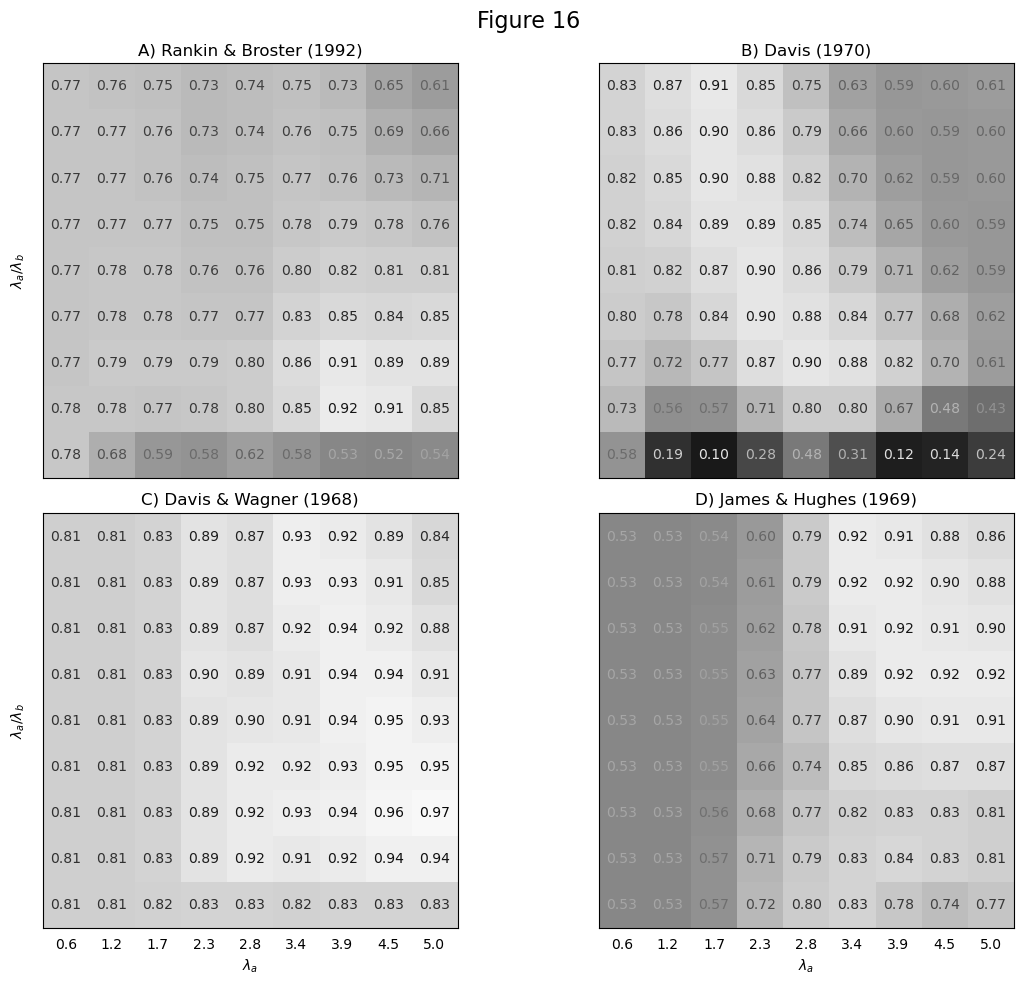

In [10]:
#Figure 15 & 16

func.fig15()
func.fig16()

100%|█████████████████████████████████████████████████████████████████████| 2600100/2600100 [02:52<00:00, 15087.70it/s]


Plotting Figure 17


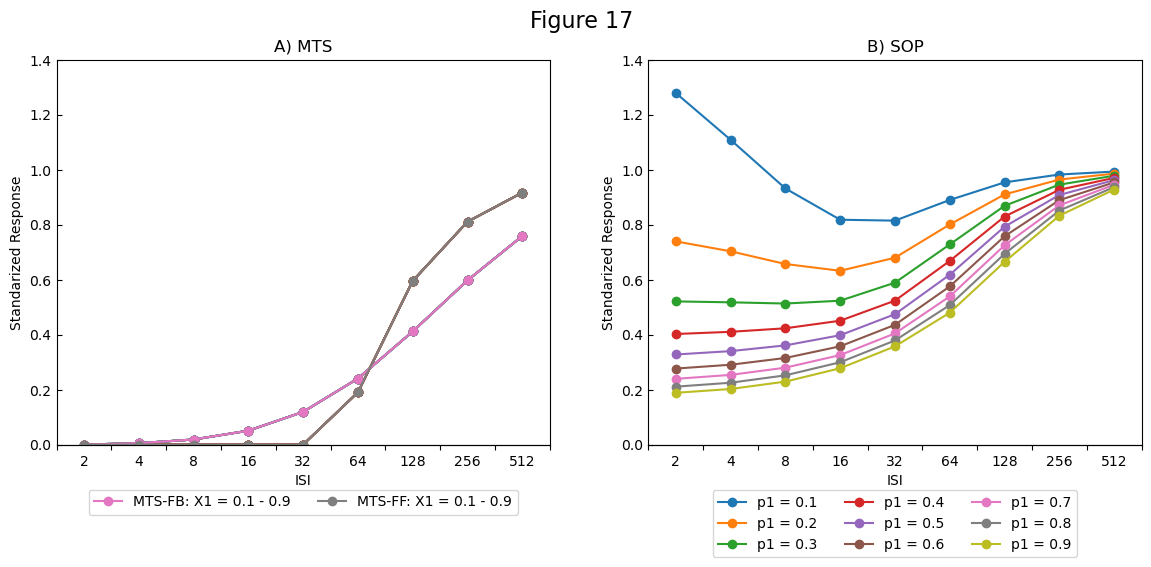

Plotting Figure 18


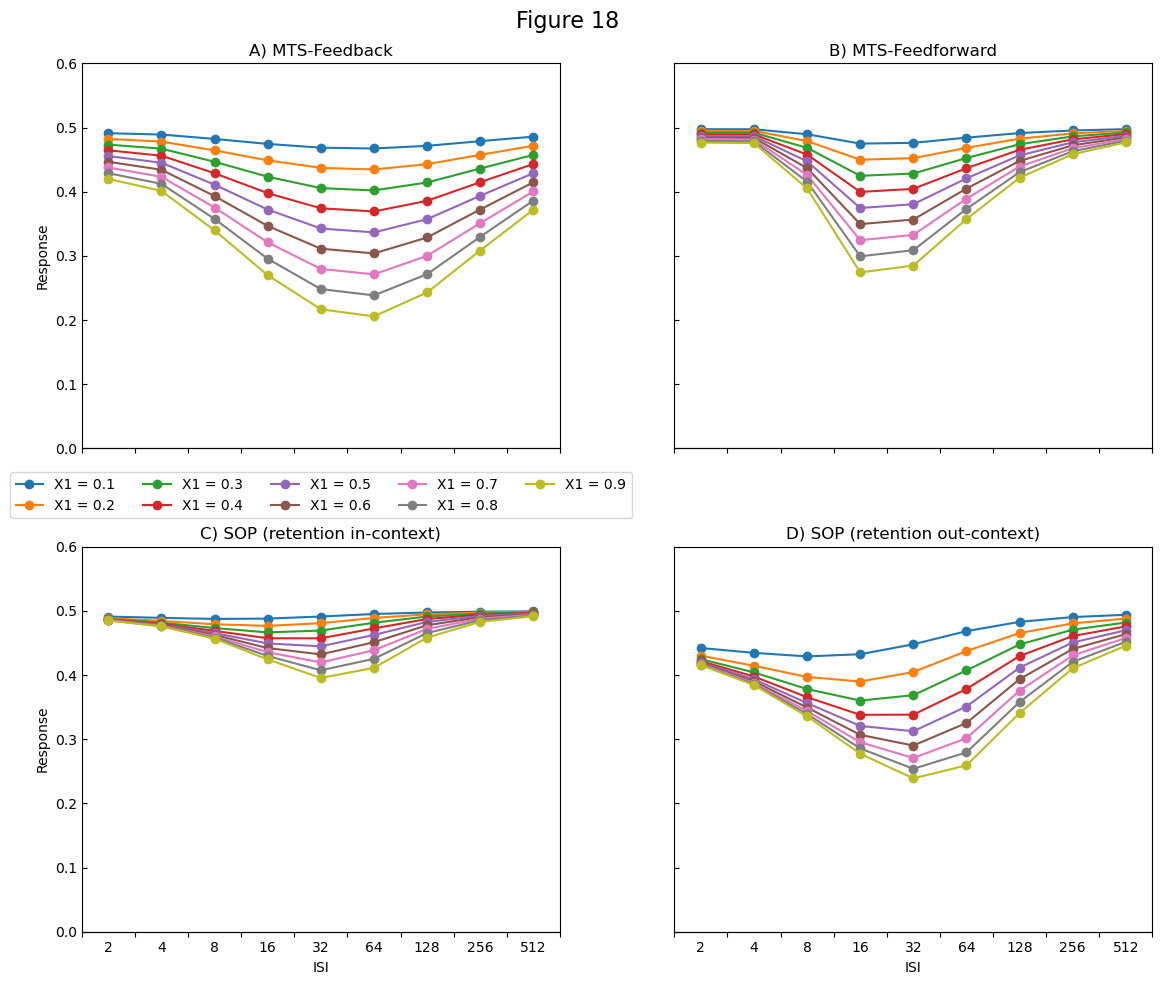

In [11]:
#Figure 17 & 18
time = np.linspace(0,32100,32101,dtype=int)

trials = 9*[hab.trials(60,2**i,30) for i in range(1,10)]
tests = [hab.test(1800, trials[i][-1]) for i in range(81)]

stimuli = [trials[i] + tests[i] for i in range(81)]
stimuli_context = [np.concatenate([time[0:stimuli[i][-2] + 12], time[stimuli[i][-1]-31::]]) for i in range(81)]

intensities = [i/10 for i in range(1,10) for _ in range(9)]

#MTS
MTS_FB = [] #MTS-FB
MTS_FF = [] #MTS-FF
for _ in range(81):
    MTS_FB.append(hab.MTS(len(time))) #Feedback
    MTS_FF.append(hab.MTS(len(time), lambda_a=3.5, lambda_b=1.5)) #Feedforward

#SOP
SOP_in = [] #RI in
SOP_out = [] #RI out
for _ in range(81):
    SOP_in_stimulus = hab.SOP_Node(len(time))
    SOP_in_context = hab.SOP_Node(len(time),p1 = 0.05)
    SOP_in_stimulus.associate(len(time),SOP_in_context)
    SOP_in.append([SOP_in_stimulus,SOP_in_context])
    
    SOP_out_stimulus = hab.SOP_Node(len(time))
    SOP_out_context = hab.SOP_Node(len(time),p1 = 0.05)
    SOP_out_stimulus.associate(len(time),SOP_out_context)
    SOP_out.append([SOP_out_stimulus,SOP_out_context])

with tqdm(total=81 * len(time[0:-1])) as pbar:
    for c in range(81):
        intensity = intensities[c]
        for i in time[0:-1]:
            s = 1 if i in stimuli[c] else 0
            s_context = 1 if i in stimuli_context[c] else 0
            
            if i == stimuli[c][-1]:
                intensity = 0.5
            
            MTS_FB[c].update("FB",i,s,intensity)
            MTS_FF[c].update("FF",i,s,intensity)
            
            SOP_in[c][1].update(i,1)
            SOP_in[c][0].update(i,s,intensity)
            
            SOP_out[c][1].update(i,s_context)
            SOP_out[c][0].update(i,s,intensity)
            
            pbar.update(1)

func.fig17(MTS_FB, MTS_FF, SOP_in, stimuli, time)
func.fig18(MTS_FB, MTS_FF, SOP_in, SOP_out, stimuli, time)